### Setup and Imports

This cell imports the necessary Python libraries for the project:  
- `numpy` and `pandas` for numerical operations and data handling.  
- `matplotlib.pyplot` for data visualization.  
- `Path` from `pathlib` for handling file paths.  
- `joblib` for saving/loading models.  
- `json` for reading/writing JSON files.  

It also sets a **random state** for reproducibility and creates an `artifacts` directory to store outputs like models, plots, or processed data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import joblib
import json
RANDOM_STATE = 42
ARTIFACTS_DIR = Path("artifacts"); ARTIFACTS_DIR.mkdir(exist_ok=True)

### Importing Scikit-Learn Modules

This cell imports key modules from `scikit-learn` for building and evaluating machine learning models:  

- **Data Splitting & Cross-Validation:**  
  `train_test_split`, `StratifiedShuffleSplit`, `KFold`, `cross_validate`, `GridSearchCV`  

- **Preprocessing & Pipelines:**  
  `ColumnTransformer`, `Pipeline`, `SimpleImputer`, `OneHotEncoder`, `StandardScaler`  

- **Models:**  
  `LinearRegression`, `Ridge`, `Lasso`  

- **Evaluation Metrics:**  
  `r2_score`, `mean_squared_error`, `mean_absolute_error`  

- **Target Transformation:**  
  `TransformedTargetRegressor` for applying transformations to the target variable (e.g., log scaling).

In [2]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.compose import TransformedTargetRegressor

### Loading the Dataset

This cell reads the California housing dataset from a CSV file into a Pandas DataFrame named `df`.  
The variable `DATA_PATH` stores the path to the CSV file for easy reference.

In [3]:
DATA_PATH = "california_housing.csv"
df = pd.read_csv(DATA_PATH)

### Previewing the Dataset

This cell displays the first few rows of the DataFrame using `head()`.  
It helps to quickly inspect the dataset's structure, column names, and sample values before further analysis.

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Dataset Information

This cell provides a summary of the DataFrame using `info()`, including:  
- Number of rows and columns  
- Column names and data types  
- Non-null counts for each column  

This helps identify missing values and understand the dataset structure.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Statistical Summary of the Dataset

This cell generates descriptive statistics for all columns using `describe(include="all")` and transposes the result for readability.  

It provides:  
- Count, mean, std, min, max for numerical columns  
- Unique values, top values, and frequency for categorical columns  

This helps in understanding data distribution and spotting anomalies.

In [6]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640.0,NaN,NaN,NaN,-119.569704,2.003532,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640.0,NaN,NaN,NaN,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640.0,NaN,NaN,NaN,28.639486,12.585558,1.0,18.0,29.0,37.0,52.0
total_rooms,20640.0,NaN,NaN,NaN,2635.763081,2181.615252,2.0,1447.75,2127.0,3148.0,39320.0
total_bedrooms,20433.0,NaN,NaN,NaN,537.870553,421.38507,1.0,296.0,435.0,647.0,6445.0
population,20640.0,NaN,NaN,NaN,1425.476744,1132.462122,3.0,787.0,1166.0,1725.0,35682.0
households,20640.0,NaN,NaN,NaN,499.53968,382.329753,1.0,280.0,409.0,605.0,6082.0
median_income,20640.0,NaN,NaN,NaN,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,NaN,NaN,NaN,206855.816909,115395.615874,14999.0,119600.0,179700.0,264725.0,500001.0
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Overview and Missing Values

This cell provides a quick overview of the dataset:  
- **Shape:** Number of rows and columns  
- **Missing Values:** Counts of missing data per column  
- **Categorical Values:** Lists unique categories in the `ocean_proximity` column (if it exists)  

This helps in understanding dataset completeness and categorical features for preprocessing.

In [7]:
print("Shape:", df.shape)
print("\nMissing values per column:")
print(df.isna().sum().sort_values(ascending=False))
print("\nUnique categories in 'ocean_proximity' (if present):")
print(df["ocean_proximity"].unique() if "ocean_proximity" in df.columns else "No categorical column found")

Shape: (20640, 10)

Missing values per column:
total_bedrooms        207
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Unique categories in 'ocean_proximity' (if present):
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


### Defining Target and Feature Columns

This cell sets up the target variable and separates feature columns:  

- **TARGET:** `"median_house_value"` is the variable we want to predict.  
- **features:** All columns except the target  
- **num_features:** Numerical feature columns  
- **cat_features:** Categorical feature columns  

It also checks that the target column exists in the dataset and displays the numerical and categorical features for reference.

In [8]:
TARGET = "median_house_value"

assert TARGET in df.columns, f"Couldn't find target column {TARGET!r}."
features = [c for c in df.columns if c != TARGET]
num_features = [c for c in features if df[c].dtype != 'object']
cat_features = [c for c in features if df[c].dtype == 'object']

num_features, cat_features

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income'],
 ['ocean_proximity'])

### Visualizing Numerical Features

This cell plots histograms for all numerical features to explore their distributions.  

- **Bins:** 30 intervals for each histogram  
- **Purpose:** Helps identify skewness, outliers, and general data patterns before preprocessing or modeling.

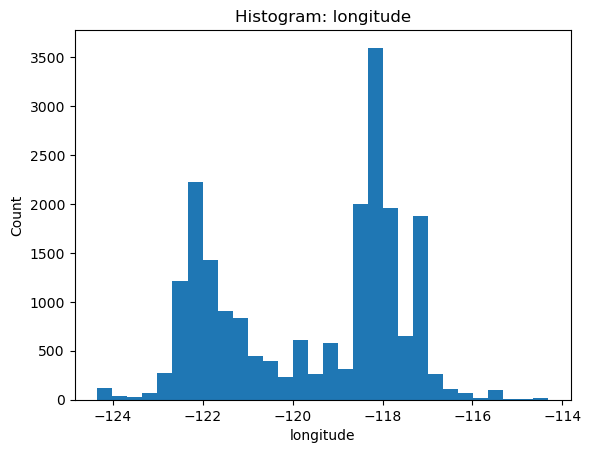

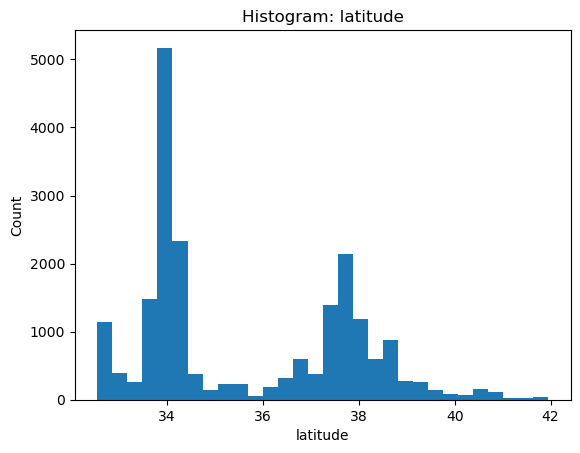

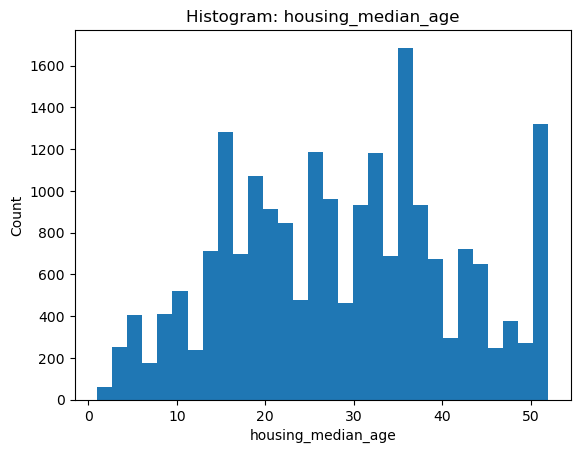

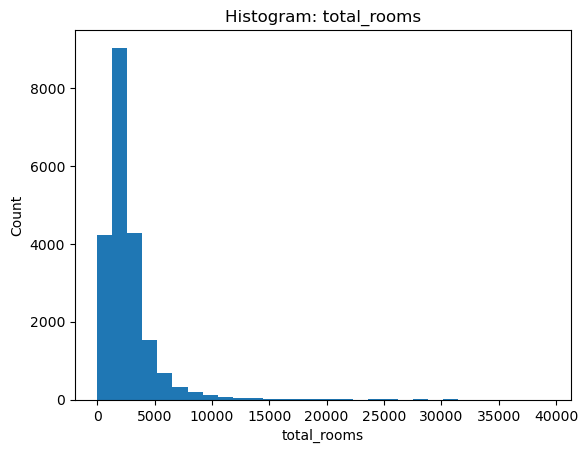

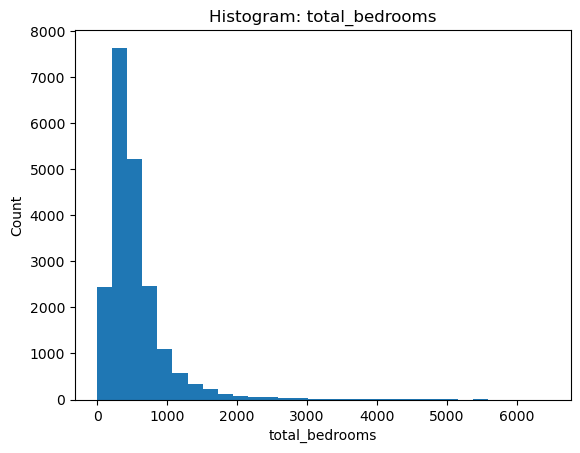

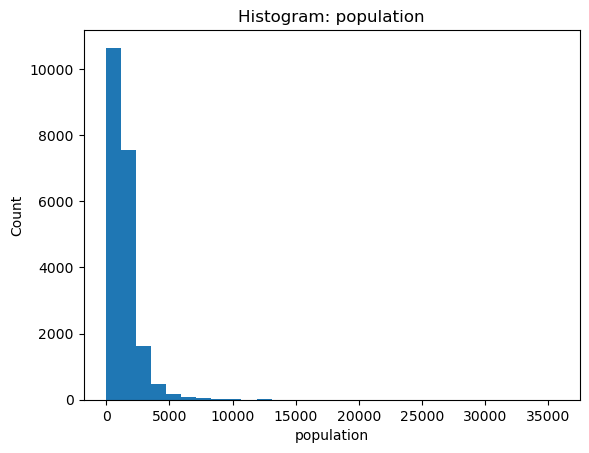

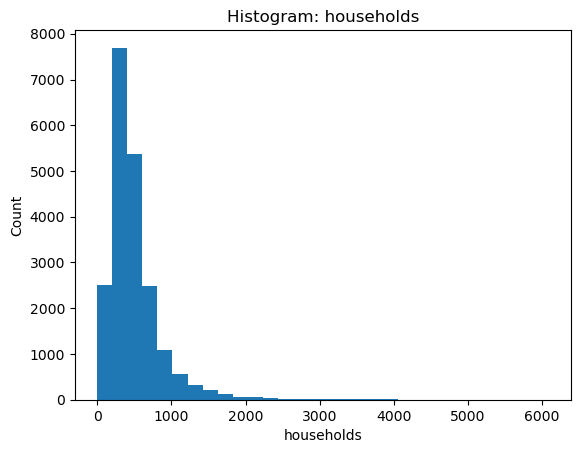

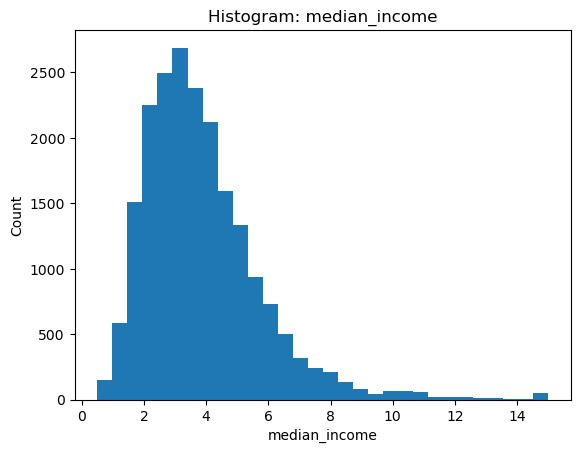

In [9]:
for col in num_features:
    df[col].plot(kind="hist", bins=30, title=f"Histogram: {col}")
    plt.xlabel(col); plt.ylabel("Count"); plt.show()

### Visualizing Target Variable

This cell plots a histogram of the target variable `median_house_value`.  

- **Bins:** 40 intervals for better granularity  
- **Purpose:** Helps understand the distribution of house values, check for skewness, and guide potential transformations.

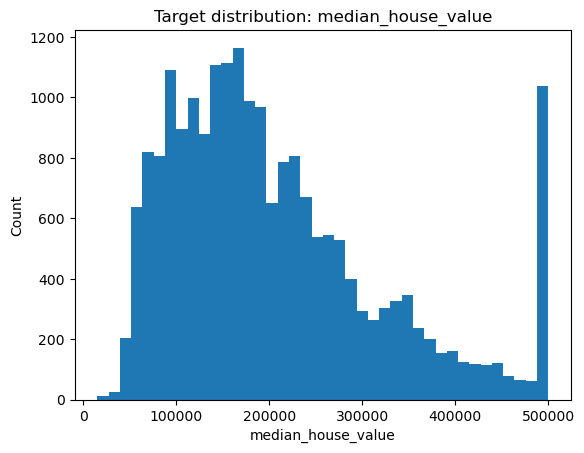

In [10]:
df[TARGET].plot(kind="hist", bins=40, title="Target distribution: median_house_value")
plt.xlabel(TARGET); plt.ylabel("Count"); plt.show()

### Correlation with Target

This cell calculates the correlation of each numerical feature with the target variable `median_house_value`.  

- **Purpose:** Identifies which features are most strongly related to the target.  
- **Numeric-only:** Ensures only numerical columns are considered.  
- **Sorted by absolute value:** Highlights features with the strongest influence, regardless of positive or negative correlation.

In [11]:
corrs = df[num_features + [TARGET]].corr(numeric_only=True)[TARGET].drop(TARGET).sort_values(key=lambda s: s.abs(), ascending=False)
corrs.to_frame(name="corr_with_target")

,corr_with_target
median_income,0.688075
latitude,-0.144160
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
longitude,-0.045967
population,-0.024650


### Scatter Plots of Top Correlated Features

This cell visualizes the relationship between the top 3 numerical features most correlated with `median_house_value` and the target variable.  

- **Purpose:** Helps understand linear or non-linear relationships and potential predictive power of these features.  
- **Alpha=0.3:** Makes overlapping points more transparent for clearer visualization.

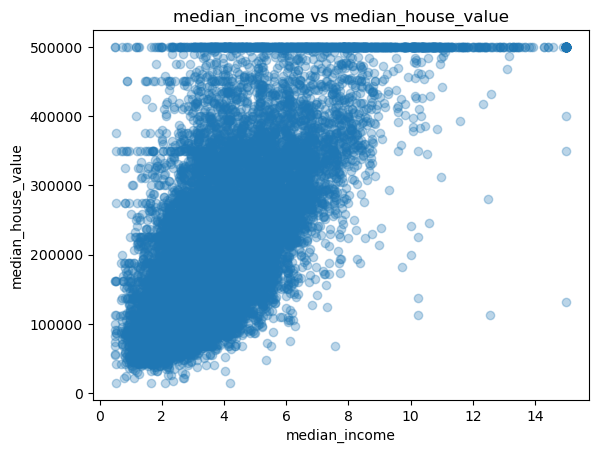

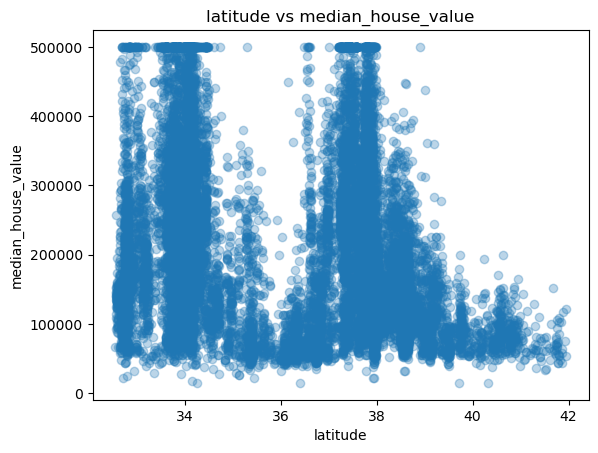

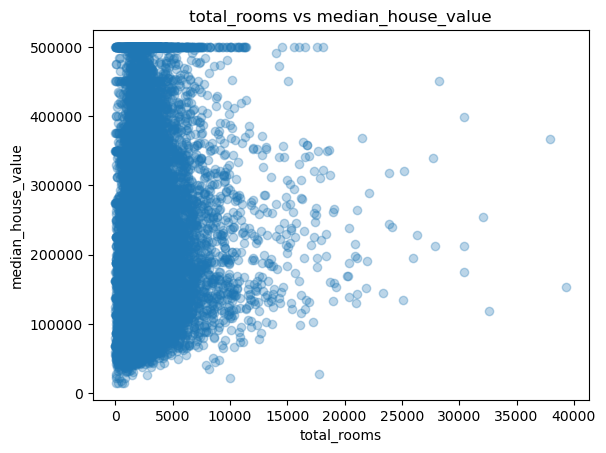

In [12]:
top3 = corrs.abs().head(3).index.tolist()
for col in top3:
    plt.scatter(df[col], df[TARGET], alpha=0.3)
    plt.xlabel(col); plt.ylabel(TARGET); plt.title(f"{col} vs {TARGET}")
    plt.show()

### Geographic Visualization of Data

This cell creates a scatter plot of housing locations using `longitude` and `latitude`.  

- **Purpose:** Provides a geographic overview of the dataset to observe clustering, population density, or regional patterns.  
- **Alpha & Marker Size:** `alpha=0.2` and `s=5` improve visibility of dense areas.

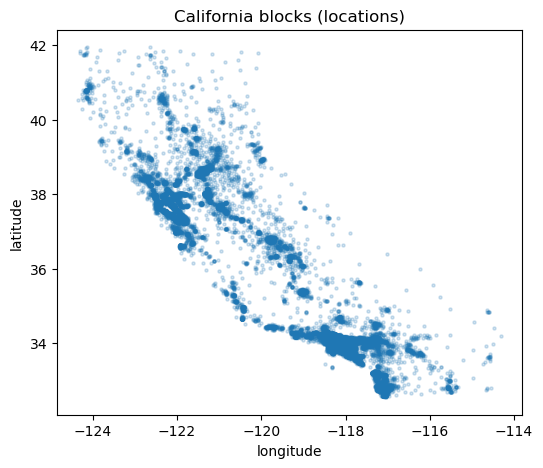

In [13]:
if {"longitude","latitude"}.issubset(df.columns):
    plt.figure(figsize=(6,5))
    plt.scatter(df["longitude"], df["latitude"], alpha=0.2, s=5)
    plt.xlabel("longitude"); plt.ylabel("latitude"); plt.title("California blocks (locations)")
    plt.show()

### Stratified Train-Test Split

This cell splits the dataset into training and testing sets using **stratified sampling** based on `median_income` categories:  

- **Income Categories:** Created by dividing `median_income` by 1.5 and capping at 5  
- **StratifiedShuffleSplit:** Ensures that the train and test sets maintain a similar distribution of income categories  
- **Result:**  
  - `X_train`, `y_train` → features and target for training  
  - `X_test`, `y_test` → features and target for testing  
- **Purpose:** Preserves important feature distributions to avoid sampling bias.

In [14]:
assert "median_income" in df.columns, "Expected 'median_income' column for stratification."
df = df.copy()
df["income_cat"] = np.ceil(df["median_income"] / 1.5)
df["income_cat"] = df["income_cat"].where(df["income_cat"] < 5, 5.0)

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_STATE)
for train_idx, test_idx in splitter.split(df, df["income_cat"]):
    strat_train_set = df.iloc[train_idx].drop(columns=["income_cat"])
    strat_test_set  = df.iloc[test_idx].drop(columns=["income_cat"])

X_train = strat_train_set[features]
y_train = strat_train_set[TARGET]
X_test  = strat_test_set[features]
y_test  = strat_test_set[TARGET]

X_train.shape, X_test.shape

((16512, 9), (4128, 9))

### Preprocessing Pipelines

This cell sets up preprocessing for numerical and categorical features using `Pipeline` and `ColumnTransformer`:  

- **Numeric Transformer:**  
  - `SimpleImputer(strategy="median")` → fills missing values with the median  
  - `StandardScaler()` → standardizes features for better model performance  

- **Categorical Transformer:**  
  - `SimpleImputer(strategy="most_frequent")` → fills missing categorical values  
  - `OneHotEncoder` → converts categories into binary columns, ignoring unknown values  

- **ColumnTransformer:**  
  - Applies the appropriate transformation to each type of feature  
  - Drops any remaining columns not specified

In [15]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_features),
        ("cat", categorical_transformer, cat_features)
    ],
    remainder="drop"
)

### Model Evaluation Functions

This cell defines two helper functions for assessing model performance:  

1. **`cv_report(model, X, y, cv_splits=5)`**  
   - Performs K-Fold cross-validation  
   - Returns average metrics:  
     - `R²` (coefficient of determination)  
     - `RMSE` (root mean squared error)  
     - `MAE` (mean absolute error)  

2. **`evaluate(model, X_test, y_test, tag="test")`**  
   - Predicts on test data  
   - Computes and prints R², RMSE, MSE, and MAE  
   - Returns predictions and metrics dictionary  

These functions provide quick and consistent evaluation for different models.

In [16]:
def cv_report(model, X, y, cv_splits=5):
    cv = KFold(n_splits=cv_splits, shuffle=True, random_state=RANDOM_STATE)
    scoring = {"r2": "r2", "neg_mse": "neg_mean_squared_error", "neg_mae": "neg_mean_absolute_error"}
    out = cross_validate(model, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    r2 = out["test_r2"].mean()
    rmse = np.sqrt((-out["test_neg_mse"]).mean())
    mae = (-out["test_neg_mae"]).mean()
    return {"cv_r2": float(r2), "cv_rmse": float(rmse), "cv_mae": float(mae)}

def evaluate(model, X_test, y_test, tag="test"):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{tag.upper()} — R²: {r2:.4f} | RMSE: {rmse:.2f} | MSE: {mse:.2f} | MAE: {mae:.2f}")
    return y_pred, {"r2": float(r2), "rmse": float(rmse), "mse": float(mse), "mae": float(mae)}

### Diagnostic Plots for Model Performance

This cell defines two plotting functions to visually assess predictions:  

1. **`residual_plot(y_true, y_pred)`**  
   - Plots residuals (difference between actual and predicted values) against predicted values  
   - Helps identify patterns, heteroscedasticity, or model bias  

2. **`parity_plot(y_true, y_pred)`**  
   - Plots actual vs predicted values with a reference line (`y = x`)  
   - Helps evaluate how closely predictions match actual values  

These plots are useful for diagnosing model fit beyond numerical metrics.

In [17]:
def residual_plot(y_true, y_pred, title="Residual Plot"):
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, alpha=0.4)
    plt.axhline(0, linestyle="--")
    plt.xlabel("Predicted"); plt.ylabel("Residual (y_true - y_pred)"); plt.title(title)
    plt.show()

def parity_plot(y_true, y_pred, title="Actual vs Predicted"):
    plt.scatter(y_true, y_pred, alpha=0.4)
    plt.xlabel("Actual"); plt.ylabel("Predicted"); plt.title(title)
    # Reference line
    lims = [min(min(y_true), min(y_pred)), max(max(y_true), max(y_pred))]
    plt.plot(lims, lims, linestyle="--")
    plt.show()

### Baseline Linear Regression Model

This cell builds a **pipeline** combining preprocessing and a Linear Regression model:  

- **Pipeline Steps:**  
  1. `preprocessor` → applies numeric and categorical transformations  
  2. `LinearRegression()` → fits a simple linear model  

- **Evaluation:**  
  - Uses `cv_report` to perform 5-fold cross-validation  
  - Returns average R², RMSE, and MAE as baseline performance metrics

In [18]:
linreg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LinearRegression())
])

print("== LinearRegression (baseline) ==")
cv_lin = cv_report(linreg, X_train, y_train, cv_splits=5)
cv_lin

== LinearRegression (baseline) ==


{'cv_r2': 0.6417390402404755,
 'cv_rmse': 69251.53867663405,
 'cv_mae': 49980.451840503185}

### Evaluating Linear Regression on Test Set

This cell fits the Linear Regression pipeline on the training data and evaluates it on the test set:  

- **`evaluate` function:** Computes R², RMSE, MSE, and MAE  
- **Residual Plot:** Checks the distribution of prediction errors  
- **Parity Plot:** Visualizes how closely predicted values match actual values  

This helps assess baseline model performance and identify areas for improvement.

TEST-BASELINE — R²: 0.6520 | RMSE: 67346.88 | MSE: 4535602240.03 | MAE: 49775.60


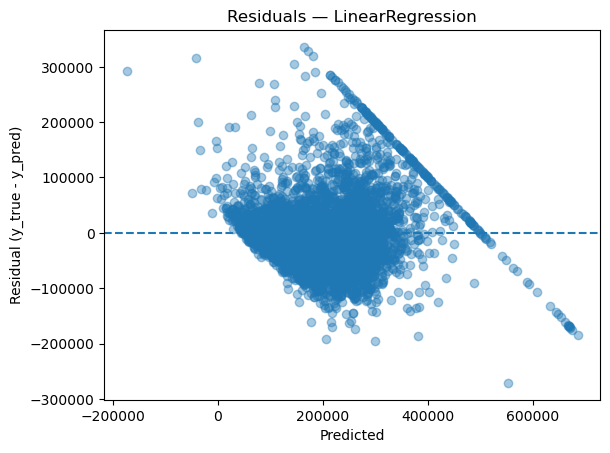

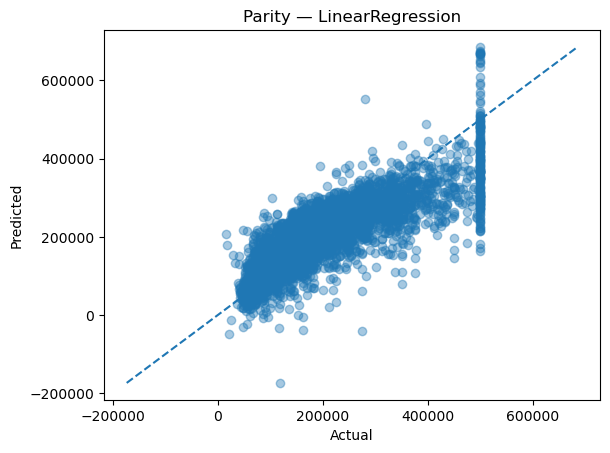

In [19]:
linreg.fit(X_train, y_train)
y_pred_lin, test_lin = evaluate(linreg, X_test, y_test, tag="test-baseline")

residual_plot(y_test, y_pred_lin, title="Residuals — LinearRegression")
parity_plot(y_test, y_pred_lin, title="Parity — LinearRegression")

### Ridge Regression with Hyperparameter Tuning

This cell builds a **Ridge Regression** pipeline and optimizes the regularization parameter `alpha` using **GridSearchCV**:  

- **Pipeline Steps:**  
  1. `preprocessor` → applies preprocessing  
  2. `Ridge()` → linear model with L2 regularization  

- **Grid Search:**  
  - Tests `alpha` values from `0.001` to `1000` (log scale)  
  - Uses 5-fold cross-validation to select the best alpha  

- **Evaluation:**  
  - Prints best `alpha` and cross-validated R²  
  - Evaluates the best model on the test set using `evaluate`

In [20]:
ridge = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge(random_state=RANDOM_STATE))
])
ridge_grid = {"model__alpha": np.logspace(-3, 3, 13)}
ridge_cv = GridSearchCV(ridge, ridge_grid, scoring="r2",
                        cv=KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
                        n_jobs=-1, refit=True)
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_
print("Ridge best alpha:", ridge_cv.best_params_["model__alpha"], "| CV R²:", ridge_cv.best_score_)
y_pred_ridge, test_ridge = evaluate(best_ridge, X_test, y_test, tag="test-ridge")

Ridge best alpha: 31.622776601683793 | CV R²: 0.6417960084416128
TEST-RIDGE — R²: 0.6504 | RMSE: 67501.16 | MSE: 4556406068.23 | MAE: 49820.33


### Lasso Regression with Hyperparameter Tuning

This cell builds a **Lasso Regression** pipeline and tunes the regularization parameter `alpha` using **GridSearchCV**:  

- **Pipeline Steps:**  
  1. `preprocessor` → applies preprocessing  
  2. `Lasso()` → linear model with L1 regularization (encourages sparsity)  

- **Grid Search:**  
  - Tests `alpha` values from `0.001` to `10` (log scale)  
  - Uses 5-fold cross-validation to find the best alpha  

- **Evaluation:**  
  - Prints the optimal `alpha` and CV R²  
  - Evaluates the selected model on the test set with `evaluate`

In [21]:
lasso = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Lasso(random_state=RANDOM_STATE, max_iter=10000))
])
lasso_grid = {"model__alpha": np.logspace(-3, 1, 9)}
lasso_cv = GridSearchCV(lasso, lasso_grid, scoring="r2",
                        cv=KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE),
                        n_jobs=-1, refit=True)
lasso_cv.fit(X_train, y_train)
best_lasso = lasso_cv.best_estimator_
print("Lasso best alpha:", lasso_cv.best_params_["model__alpha"], "| CV R²:", lasso_cv.best_score_)
y_pred_lasso, test_lasso = evaluate(best_lasso, X_test, y_test, tag="test-lasso")

/Users/vybhavk24/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.092e+12, tolerance: 1.779e+10
  model = cd_fast.enet_coordinate_descent(
/Users/vybhavk24/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.092e+12, tolerance: 1.779e+10
  model = cd_fast.enet_coordinate_descent(
/Users/vybhavk24/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

Lasso best alpha: 10.0 | CV R²: 0.6417559343267101
TEST-LASSO — R²: 0.6512 | RMSE: 67419.69 | MSE: 4545414606.26 | MAE: 49798.68


### Linear Regression with Log-Transformed Target

This cell applies a **log transformation** to the target variable to improve model performance on skewed data using `TransformedTargetRegressor`:  

- **Pipeline Steps:**  
  1. `preprocessor` → applies preprocessing  
  2. `LinearRegression()` → fits the model on transformed target  

- **Target Transformation:**  
  - `func=np.log1p` → transforms `y` during training  
  - `inverse_func=np.expm1` → converts predictions back to original scale  

- **Evaluation:**  
  - Performs 5-fold cross-validation (`cv_report`)  
  - Fits the model on training data  
  - Evaluates and visualizes predictions using residual and parity plots  

This approach often improves accuracy when the target is skewed or has outliers.

TEST-LINREG-LOG1P — R²: 0.4491 | RMSE: 84737.41 | MSE: 7180428479.19 | MAE: 50653.54


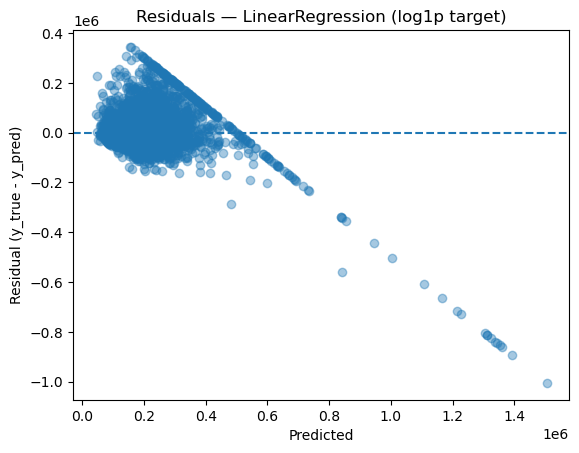

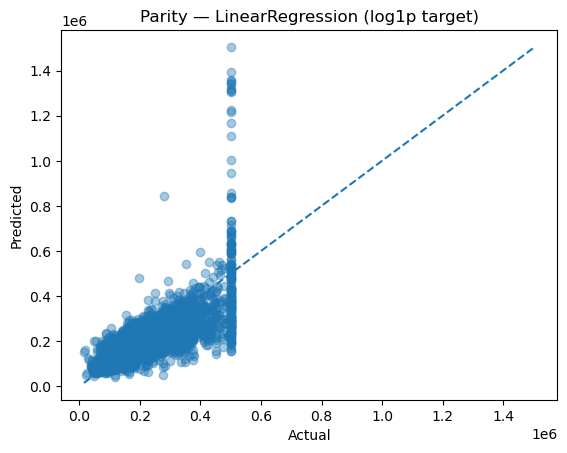

({'cv_r2': 0.4423098140442251,
  'cv_rmse': 86360.90335152774,
  'cv_mae': 51233.902777814146},
 {'r2': 0.4490642402490037,
  'rmse': 84737.40897143273,
  'mse': 7180428479.191848,
  'mae': 50653.54011077148})

In [22]:
linreg_log = TransformedTargetRegressor(
    regressor=Pipeline(steps=[("preprocessor", preprocessor), ("model", LinearRegression())]),
    func=np.log1p, inverse_func=np.expm1
)
cv_lin_log = cv_report(linreg_log, X_train, y_train, cv_splits=5)
linreg_log.fit(X_train, y_train)
y_pred_lin_log, test_lin_log = evaluate(linreg_log, X_test, y_test, tag="test-linreg-log1p")
residual_plot(y_test, y_pred_lin_log, title="Residuals — LinearRegression (log1p target)")
parity_plot(y_test, y_pred_lin_log, title="Parity — LinearRegression (log1p target)")
cv_lin_log, test_lin_log

### Model Performance Summary

This cell creates a **summary table** comparing all trained models:  

- **Columns:**  
  - `model` → Model name  
  - `cv_r2` → Cross-validated R² on training set  
  - `test_r2` → R² on test set  
  - `test_rmse` → Root Mean Squared Error on test set  
  - `test_mae` → Mean Absolute Error on test set  

- **Purpose:**  
  - Provides an at-a-glance comparison of model performance  
  - Sorts models by test R² to identify the best-performing model.

In [23]:
summary = pd.DataFrame({
    "model": ["Linear", "Ridge", "Lasso", "Linear (log1p y)"],
    "cv_r2": [cv_lin["cv_r2"], ridge_cv.best_score_, lasso_cv.best_score_, cv_lin_log["cv_r2"]],
    "test_r2": [test_lin["r2"], test_ridge["r2"], test_lasso["r2"], test_lin_log["r2"]],
    "test_rmse": [test_lin["rmse"], test_ridge["rmse"], test_lasso["rmse"], test_lin_log["rmse"]],
    "test_mae": [test_lin["mae"], test_ridge["mae"], test_lasso["mae"], test_lin_log["mae"]],
})
summary.sort_values("test_r2", ascending=False)

,model,cv_r2,test_r2,test_rmse,test_mae
0,Linear,0.641739,0.651995,67346.879958,49775.595699
2,Lasso,0.641756,0.651242,67419.690049,49798.677955
1,Ridge,0.641796,0.650399,67501.156051,49820.330166
3,Linear (log1p y),0.442310,0.449064,84737.408971,50653.540111


### Feature Importance from the Best Model

This cell identifies the **most influential features** of the best-performing model:  

- **Select Best Model:** Compares `linear`, `ridge`, and `lasso` based on R² on the test set  
- **Recover Feature Names:**  
  - Combines numerical features with one-hot encoded categorical feature names  
- **Extract Coefficients:**  
  - Retrieves model coefficients for each feature  
  - Calculates absolute values to rank by importance  

- **Output:**  
  - Displays the top 15 features contributing most to the model’s predictions

In [24]:
candidates = {
    "linear": (linreg, y_pred_lin),
    "ridge": (best_ridge, y_pred_ridge),
    "lasso": (best_lasso, y_pred_lasso)
}
best_name, (best_model, best_preds) = max(
    candidates.items(), key=lambda kv: r2_score(y_test, kv[1][1])
)

# Recover feature names after preprocessing
pre = best_model.named_steps["preprocessor"]
ohe = pre.named_transformers_["cat"].named_steps["onehot"] if len(cat_features) else None
num_names = num_features
cat_names = list(ohe.get_feature_names_out(cat_features)) if ohe is not None else []
all_names = num_names + cat_names

lin = best_model.named_steps["model"]
coefs = getattr(lin, "coef_", None)
coef_df = pd.DataFrame({"feature": all_names, "coef": coefs.ravel()})
coef_df["abs_coef"] = coef_df["coef"].abs()
coef_df.sort_values("abs_coef", ascending=False).head(15)

,feature,coef,abs_coef
10,ocean_proximity_ISLAND,112925.817971,112925.817971
7,median_income,73737.442494,73737.442494
9,ocean_proximity_INLAND,-57836.499819,57836.499819
1,latitude,-54016.744209,54016.744209
0,longitude,-53158.467529,53158.467529
5,population,-43815.820091,43815.820091
4,total_bedrooms,29937.919033,29937.919033
6,households,28900.335622,28900.335622
11,ocean_proximity_NEAR BAY,-22517.510789,22517.510789
8,ocean_proximity_<1H OCEAN,-18139.052945,18139.052945


### Selecting the Overall Best Model

This cell identifies the **best model** across all runs based on **test R²**:  

- **`all_runs` dictionary:** Stores test metrics for each model  
- **`best_key`:** Finds the model with the highest R² on the test set  
- **`best_pipeline`:** References the corresponding trained pipeline  
- **Purpose:** Easily retrieve and save the best-performing model for deployment or further analysis

In [25]:
all_runs = {
    "linear": test_lin,
    "ridge": test_ridge,
    "lasso": test_lasso,
    "linear_log1p": test_lin_log
}
best_key = max(all_runs.items(), key=lambda kv: kv[1]["r2"])[0]
best_pipeline = {"linear": linreg, "ridge": best_ridge, "lasso": best_lasso, "linear_log1p": linreg_log}[best_key]
print("Best model:", best_key)

Best model: linear


### Saving the Best Model

This cell saves the best-performing model pipeline to disk using `joblib`:  

- **File Path:** Stored in the `artifacts` directory with a name based on the model type  
- **Purpose:** Allows loading the trained model later for predictions or deployment without retraining

In [26]:
model_path = ARTIFACTS_DIR / f"model_{best_key}.joblib"
joblib.dump(best_pipeline, model_path)

['artifacts/model_linear.joblib']

### Saving Model Metrics

This cell saves evaluation metrics of all models to a JSON file:  

- **File Path:** `artifacts/metrics.json`  
- **Contents:**  
  - Name of the best model  
  - Cross-validation and test metrics for each model (`linear`, `ridge`, `lasso`, `linear_log1p`)  
- **Purpose:** Provides a structured record of model performance for reporting, analysis, or reproducibility.

In [27]:
metrics_path = ARTIFACTS_DIR / "metrics.json"
with open(metrics_path, "w") as f:
    json.dump({
        "best_model": best_key,
        "linear": {"cv": cv_lin, "test": test_lin},
        "ridge": {"cv_r2": float(ridge_cv.best_score_), "test": test_ridge},
        "lasso": {"cv_r2": float(lasso_cv.best_score_), "test": test_lasso},
        "linear_log1p": {"cv": cv_lin_log, "test": test_lin_log}
    }, f, indent=2)

### Saving Feature Coefficients of the Best Model

This cell saves the **feature coefficients** of the best linear-based model to a CSV file:  

- **Checks:** Ensures the model has coefficients (`coef_`) before extracting  
- **Process:**  
  - Combines numerical and one-hot encoded categorical feature names  
  - Creates a DataFrame with coefficients and their absolute values  
  - Sorts by importance and saves to `artifacts/coefficients_{best_model}.csv`  

- **Purpose:** Provides a reference of feature importance for interpretation or reporting  

The cell also outputs the paths of the saved model and metrics files.

In [28]:
if hasattr(best_pipeline.named_steps.get("model", object()), "coef_"):
    pre = best_pipeline.named_steps["preprocessor"]
    ohe = pre.named_transformers_["cat"].named_steps["onehot"] if len(cat_features) else None
    num_names = num_features
    cat_names = list(ohe.get_feature_names_out(cat_features)) if ohe is not None else []
    all_names = num_names + cat_names
    coefs = best_pipeline.named_steps["model"].coef_.ravel()
    coef_df = pd.DataFrame({"feature": all_names, "coef": coefs})
    coef_df["abs_coef"] = coef_df["coef"].abs()
    coef_df.sort_values("abs_coef", ascending=False).to_csv(ARTIFACTS_DIR / f"coefficients_{best_key}.csv", index=False)

model_path, metrics_path

(PosixPath('artifacts/model_linear.joblib'),
 PosixPath('artifacts/metrics.json'))

### Making Sample Predictions

This cell uses the **best model pipeline** to predict house values for a small subset of test data:  

- **`sample`:** First 5 rows of `X_test`  
- **`predict`:** Returns predicted `median_house_value` for these samples  
- **Purpose:** Quickly verify that the trained model can generate predictions on new or unseen data.

In [29]:
sample = X_test.iloc[:5]
best_pipeline.predict(sample)

array([419992.00048286, 291826.87053631, 245738.10411714, 195557.30112654,
       264439.45160332])

### Predicting a Single Example

This cell demonstrates how to make a prediction for a **single new data point**:  

- **`example`:** Dictionary representing feature values of a California housing block  
- **`predict`:** Converts the dictionary into a DataFrame and returns the predicted `median_house_value`  
- **Purpose:** Shows how the trained pipeline can be used in practice for individual predictions.

In [30]:
example = {
    "longitude": -122.23, "latitude": 37.88, "housing_median_age": 41.0,
    "total_rooms": 880.0, "total_bedrooms": 129.0, "population": 322.0,
    "households": 126.0, "median_income": 8.3252, "ocean_proximity": "NEAR BAY"
}
best_pipeline.predict(pd.DataFrame([example]))

array([408083.12248227])